In [1]:
import pandas as pd

In [2]:
hotels = pd.read_csv('hotels.csv')
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [70]:
navive_country = []
for i, address in enumerate(hotels['hotel_address']):
    navive_country.append((
        hotels['reviewer_nationality'].iloc[i].strip() in address
        ) and (
            len(hotels['reviewer_nationality'].iloc[i].strip()) > 1
            ))
hotels['native_country'] = navive_country

In [71]:
hotels['reviewer_nationality'][hotels['native_country'] == True].value_counts()

reviewer_nationality
 United Kingdom     128041
 France               1442
 Netherlands          1338
 Spain                1318
 Italy                1102
 Austria               700
Name: count, dtype: int64

In [72]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])

In [73]:
hotels.drop_duplicates(inplace=True)

In [74]:
hotels['days_since_review'] = hotels['days_since_review'].apply(
    lambda x: int(x.replace('days','').replace('day', '').strip())
    )

In [75]:
def extract_all_tags(col:pd.Series):
    """ Аргумент: Series 
        Возвращает: Set уникальных элементов
    """
    result = []
    for column_value in col:        
        for element in column_value.split(','):
            element = element.replace('[', '')
            element = element.replace(']', '')
            element = element.replace("'", '')
            result.append(element.strip())
    return result

cols = pd.Series(extract_all_tags(hotels['tags'])).value_counts().index[0:50]
for col in cols:
    hotels[col] = hotels['tags'].apply(lambda x: col in x)
        
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64         
 9 

In [76]:
cols = hotels['reviewer_nationality'].value_counts().head(10).index
cols

Index([' United Kingdom ', ' United States of America ', ' Australia ',
       ' Ireland ', ' United Arab Emirates ', ' Saudi Arabia ',
       ' Netherlands ', ' Switzerland ', ' Canada ', ' Germany '],
      dtype='object', name='reviewer_nationality')

In [77]:
for col in cols:
    hotels[col] = hotels['reviewer_nationality'].apply(lambda x: col == x)

In [79]:
hotels['Month'] = hotels['review_date'].apply(lambda x: x.month)
hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,United States of America,Australia,Ireland,United Arab Emirates,Saudi Arabia,Netherlands,Switzerland,Canada,Germany,Month
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,False,False,False,False,False,False,False,False,False,2
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,False,False,False,False,False,False,False,False,False,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,False,False,False,False,False,False,False,False,False,10
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,False,False,False,False,False,False,False,False,False,9
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,False,False,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,2017-04-19,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,False,False,False,False,False,False,False,False,False,4
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2017-02-13,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,False,False,False,False,False,False,False,False,False,2
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2016-02-07,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,False,False,False,False,False,True,False,False,False,2
386801,31 Great Cumberland Place Westminster Borough ...,365,2017-05-21,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,False,False,False,True,False,False,False,False,False,5


In [56]:
countries = ['Kingdom', 'France', 'Italy', 'Netherlands', 'Austria', 'Spain']
for country in countries:
    hotels[country] = hotels['hotel_address'].apply(lambda x: x.split()[-1] == country)

In [57]:
hotels = hotels.select_dtypes(exclude=['object','datetime'])
hotels.fillna(hotels.median(), inplace=True)

In [58]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] / 10 # Подгоняем под сигмоиду

<AxesSubplot: >

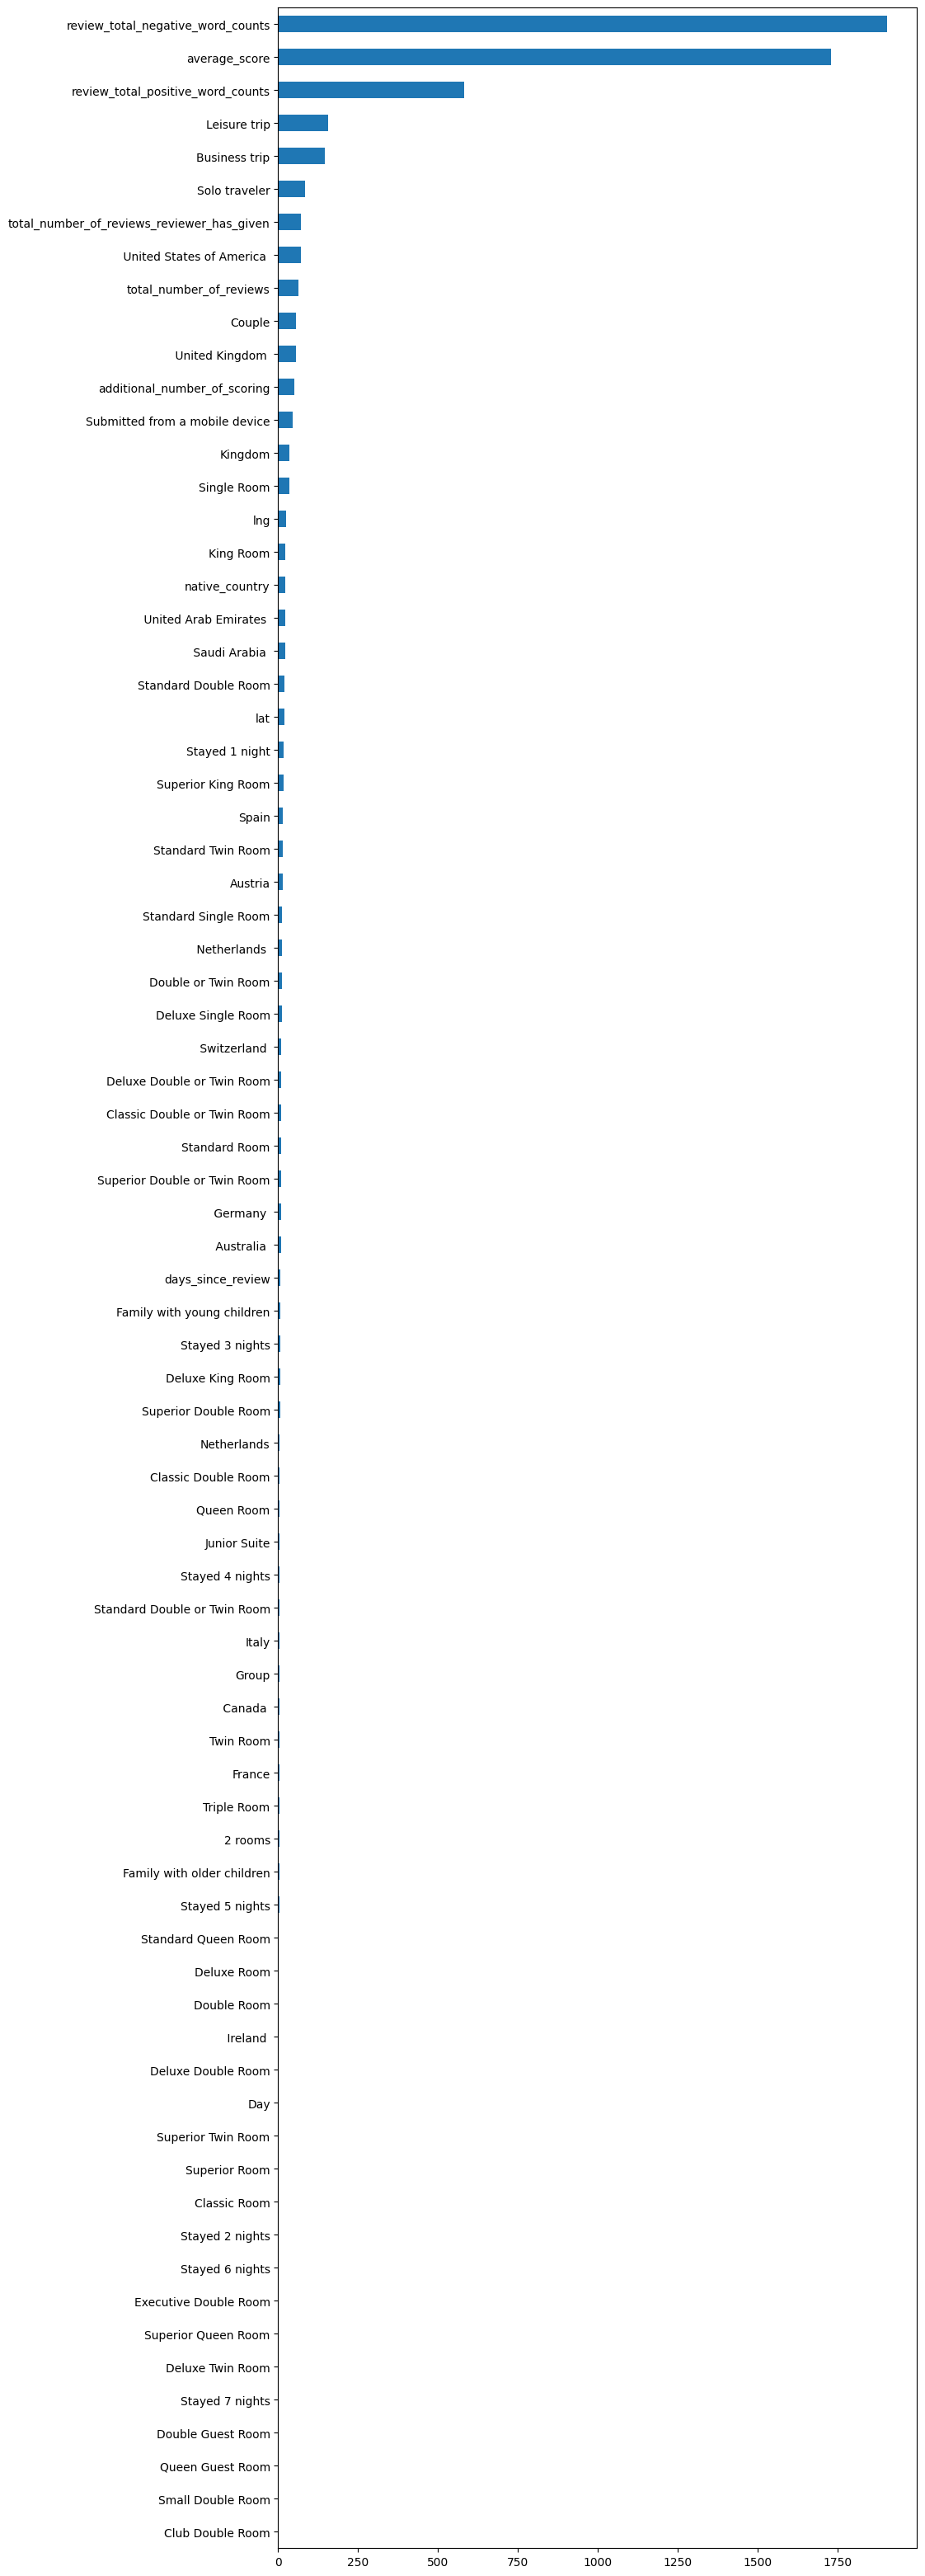

In [59]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X, y)[0], index = X.columns)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', figsize=(10,40))

In [60]:
X.drop(columns=imp_num[:35].index, inplace=True)

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   average_score                               386496 non-null  float64
 2   review_total_negative_word_counts           386496 non-null  int64  
 3   total_number_of_reviews                     386496 non-null  int64  
 4   review_total_positive_word_counts           386496 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 6   days_since_review                           386496 non-null  int64  
 7   lat                                         386496 non-null  float64
 8   lng                                         386496 non-null  float64
 9   native_country                              386496 non-null  bool   
 10  L

In [62]:
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
X = mm_scaler.fit_transform(X)

In [63]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [64]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  

# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [81]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1359550223302158


##### MAPE первоначально: 0.14140767346557795
 - 30 тэгов
 - 0.13827640951431283 нормирование х и у под сигмоиду 
 - 0.13830021302414622 нормирование только х под сигмоиду
 - 0.13831374168306468 убрал нормирование
 - 0.13830236885835417  20 тэгов и фулл нормирование 
 - 0.13656947580948478 убрал баги, нормировал, 20 тэгов
 - 0.1353737350661096 входной слой 76 нейронов